In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy.linalg import inv

class LinearRegression:

    def predict(self, features, weights):
        return np.dot(features, weights)

    def compute_cost(self, features, labels, weights):
        predictions = self.predict(features, weights)
        M = labels.shape[0]
        return np.sum(np.square(predictions - labels)) / (2 * M)

    def update_weights(self, weights, features, labels, lr):
        predictions = self.predict(features, weights)
        gradient = np.matmul(features.transpose(), predictions - labels)
        M = labels.shape[0]
        weights = weights - (lr / M) * gradient
        return weights

    def train(self, features, labels, weights, lr, iterations):
        costs_history = []
        for i in range(iterations):
            weights = self.update_weights(weights, features, labels, lr)
            cost = self.compute_cost(features, labels, weights)
            costs_history.append((i, cost))
        return weights, costs_history
    
    def train_normal_equation(self, features, labels):
        return np.dot(inv(np.matmul(features.transpose(), features)), np.matmul(features.transpose(), labels))

Plotting Data


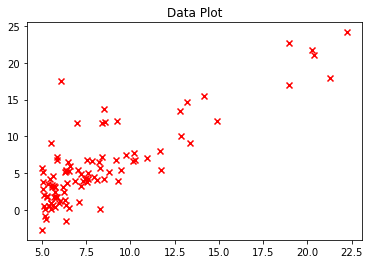

In [184]:
Data1 = np.loadtxt('ex1/ex1data1.txt', delimiter=',')
print("Plotting Data")
plt.scatter(Data1[:, 0], Data1[:, 1], c='r', marker='x')
plt.title("Data Plot")
plt.show()

In [185]:
labels = Data1[:, 1].reshape(-1, 1)
features = np.append(np.ones((labels.shape[0], 1)), Data1[:, -1].reshape(-1, 1), axis=1)
weights = np.zeros((features.shape[1], 1))
linear_regression = LinearRegression()


Printing weights =  [[8.41647098e-05]
 [9.99992283e-01]]


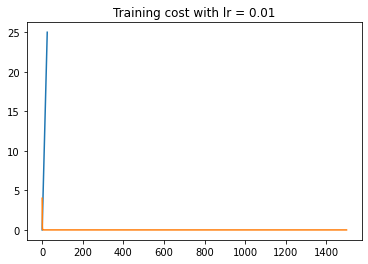

In [186]:
weights, cost_history = linear_regression.train(features, labels, weights, 0.01, 1500)
print("Printing weights = ", weights)
X = np.array([[1, 0], [1, 5], [1, 7.5], [1, 10.0], [1, 12.5], [1, 15.0], [1, 17.5], [1, 20.0], [1, 22.5], [1, 25.0]])
plt.plot([X[i][1] for i in range(len(X))], [linear_regression.predict(X[i], weights) for i in range(len(X))])
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))])
plt.title("Training cost with lr = 0.01")
plt.show()

Printing weights =  [[5.23027461e-05]
 [9.99995204e-01]]


Text(0.5, 1.0, 'Training cost with lr = 0.1')

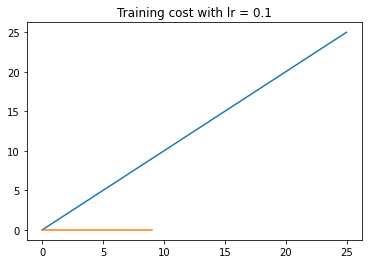

In [187]:
weights, cost_history = linear_regression.train(features, labels, weights, 0.1, 10)
print("Printing weights = ", weights)
X = np.array([[1, 0], [1, 5], [1, 7.5], [1, 10.0], [1, 12.5], [1, 15.0], [1, 17.5], [1, 20.0], [1, 22.5], [1, 25.0]])
plt.plot([X[i][1] for i in range(len(X))], [linear_regression.predict(X[i], weights) for i in range(len(X))])
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))])
plt.title("Training cost with lr = 0.1")

In [188]:
Data2 = np.loadtxt('ex1/ex1data2.txt', delimiter=',')

In [189]:
X = Data2[:, :-1]
labels =  Data2[:, -1].reshape(-1,1)
features = np.append(np.ones((labels.shape[0], 1)), X, axis=1)
weights = linear_regression.train_normal_equation(features, labels)
print(linear_regression.compute_cost(features, labels, weights))
test_features = np.array([[1,1650,3],[1,1500,2]])
print(linear_regression.predict(test_features, weights))

2043280050.6028287
[[293081.4643349 ]
 [280937.88234458]]


In [190]:
X = Data2[:, :-1]
labels =  Data2[:, -1].reshape(-1,1)
standardized_X = preprocessing.scale(X)
features = np.append(np.ones((labels.shape[0], 1)), standardized_X, axis=1)


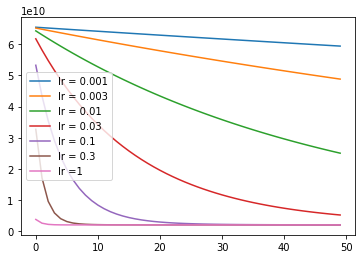

In [191]:
#Choosing learning rate
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.001, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.001")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.003, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.003")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.01, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.01")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.03, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.03")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.1, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.1")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.3, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.3")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 1, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr =1")
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 3, 50)
plt.legend()

2043280050.603576
[[293081.47339913]]


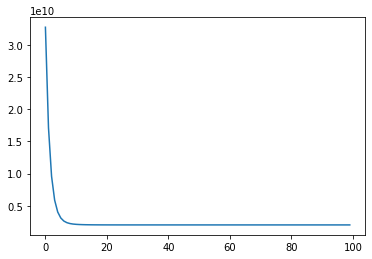

In [192]:
#choosing learning rate 0.3
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.3, 100)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.3")
print(cost_history[-1][-1])
test_features = np.array([[1,-0.4460438603276164,-0.2260933675776883]])
print(linear_regression.predict(test_features, weights))

2043282558.127608
[[293097.98526087]]


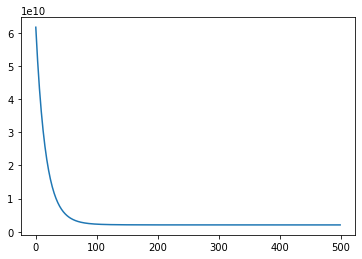

In [193]:
weights = np.zeros((features.shape[1], 1))
weights, cost_history = linear_regression.train(features, labels, weights, 0.03, 500)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))],label = "lr = 0.3")
print(cost_history[-1][-1])
weights
test_features = np.array([[1,-0.4460438603276164,-0.2260933675776883]])
print(linear_regression.predict(test_features, weights))

In [194]:
X = Data2[:, :-1]
labels =  Data2[:, -1].reshape(-1,1)
features = np.append(np.ones((labels.shape[0], 1)), X, axis=1)
weights = linear_regression.train_normal_equation(features, labels)
print(linear_regression.compute_cost(features, labels, weights))
test_features = np.array([[1,1650,3],[1,1500,2]])
print(linear_regression.predict(test_features, weights))

2043280050.6028287
[[293081.4643349 ]
 [280937.88234458]]


In [195]:
print(np.mean(X[:,0]), np.std(X[:,0]), np.mean(X[:,1]), np.std(X[:,1]))
(3-np.mean(X[:,1]))/(np.std(X[:,1]))

2000.6808510638298 786.2026187430467 3.1702127659574466 0.7528428090618781


-0.2260933675776883